In [1]:
from shelling_segregation import ShellingSegregation, make_gif
from os.path import exists

# GIFs

## baseline

In [2]:
segregation = ShellingSegregation()
L = 100
R = 4000
B = 4000
jr = 0.5
jb = 0.5
k = 1
fname = 'baseline.gif'
if not exists(fname):
    segregation.simulate(L, R, B, jr, jb, k)
    make_gif(fname, segregation.lattice_list, L, R, B, jr, jb, k)

## $j_r$ = 0.75, $j_b$ = 0.375

In [3]:
jr = 0.75
jb = 0.375
fname = 'big_diff.gif'
if not exists(fname):
    segregation.simulate(L, R, B, jr, jb, k)
    make_gif(fname, segregation.lattice_list, L, R, B, jr, jb, k)
jr = 0.5
jb = 0.5

## k = 3

In [4]:
k = 3
fname = 'big_neighbourhood.gif'
if not exists(fname):
    segregation.simulate(L, R, B, jr, jb, k)
    make_gif(fname, segregation.lattice_list, L, R, B, jr, jb, k)
k = 1

# Plots

## iterations(N)

Value: N=10000, MC: 0
step: 45, unhappy red: 0, unhappy blue: 12, avg: 0.87015, no improvement since 10 steps


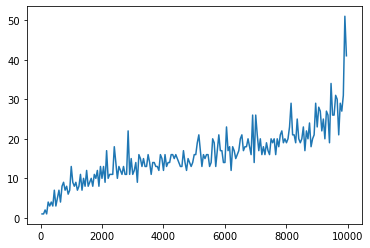

In [6]:
import json
import matplotlib.pyplot as plt
MC_N = 1
fname = "iterations_N.json"
cont = True
if exists(fname):
    with open(fname) as f:
        data = json.load(f)
    Ns = data["Ns"]
    iterations = data["iterations"]
if cont or not(exists(fname)):
    if cont:
        N = Ns[-1]
    else:
        Ns = []
        iterations = []
        N = 0
    while N <= 10000:
        N += 50
        iteration, _, not_stopped = segregation.monte_carlo(MC_N, L, int(N/2), int(N/2), jr, jb, k, False, f"N={N}")
        if not not_stopped:
            break
        Ns.append(N)
        iterations.append(iteration)

        data = {"Ns": Ns, "iterations": iterations}

        with open(fname, "w") as f:
            json.dump(data, f)
        
plt.plot(Ns, iterations)